In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
customer_info = pd.read_csv("../data/processed/customers_info.csv")

In [3]:
customer_info.drop(columns=["Unnamed: 0"], inplace = True)
features = customer_info[["total_value", "quant_orders"]]

In [4]:
features

,total_value,quant_orders
0,141.90,1
1,27.19,1
2,86.22,1
3,43.62,1
4,196.89,1
...,...,...
94978,2067.42,1
94979,84.58,1
94980,112.46,1
94981,133.69,1


In [5]:
# Standardize features by removing the mean and scaling to unit variance.
# - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
standard_scaler = StandardScaler()
features_scaled = standard_scaler.fit_transform(features)

In [6]:
# K-Means clustering.
# - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
wcss = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

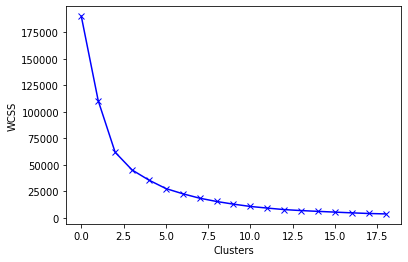

In [7]:
import matplotlib.pyplot as plt
plt.plot(wcss, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

In [8]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(features_scaled)

KMeans(n_clusters=4)

In [9]:
customer_info["cluster"] = kmeans.labels_

In [10]:
customer_info

,customer_unique_id,total_value,quant_orders,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,1,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,1,0
2,0000f46a3911fa3c0805444483337064,86.22,1,0
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,1,0
4,0004aac84e0df4da2b147fca70cf8255,196.89,1,0
...,...,...,...,...
94978,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,1,3
94979,fffea47cd6d3cc0a88bd621562a9d061,84.58,1,0
94980,ffff371b4d645b6ecea244b27531430a,112.46,1,0
94981,ffff5962728ec6157033ef9805bacc48,133.69,1,0


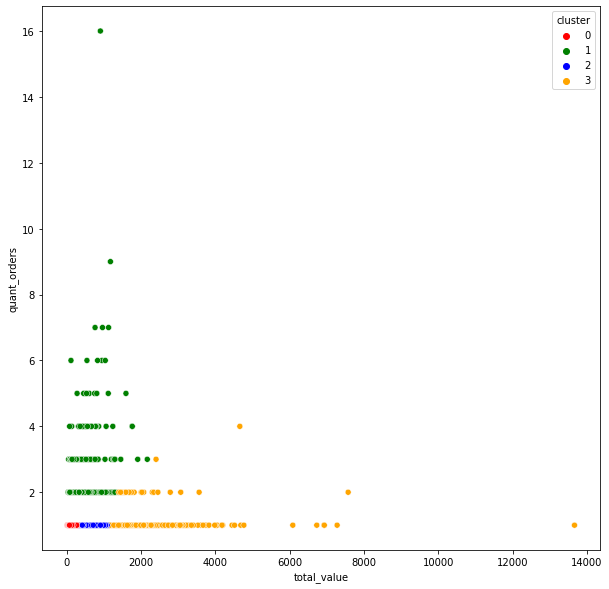

In [11]:
import seaborn as sb

plt.figure(figsize = (10, 10))
ax = sb.scatterplot(x = "total_value", y = "quant_orders", hue = "cluster", data = customer_info, palette = ['red', 'green', 'blue', 'orange'])
plt.show()

In [12]:
customer_info.to_csv("../data/processed/customers_cluster.csv")